In [2]:
from DirectDetection import DirectDetection as DD
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sigfig import round

In [3]:
DD.init()

Found: 114 files...Done!


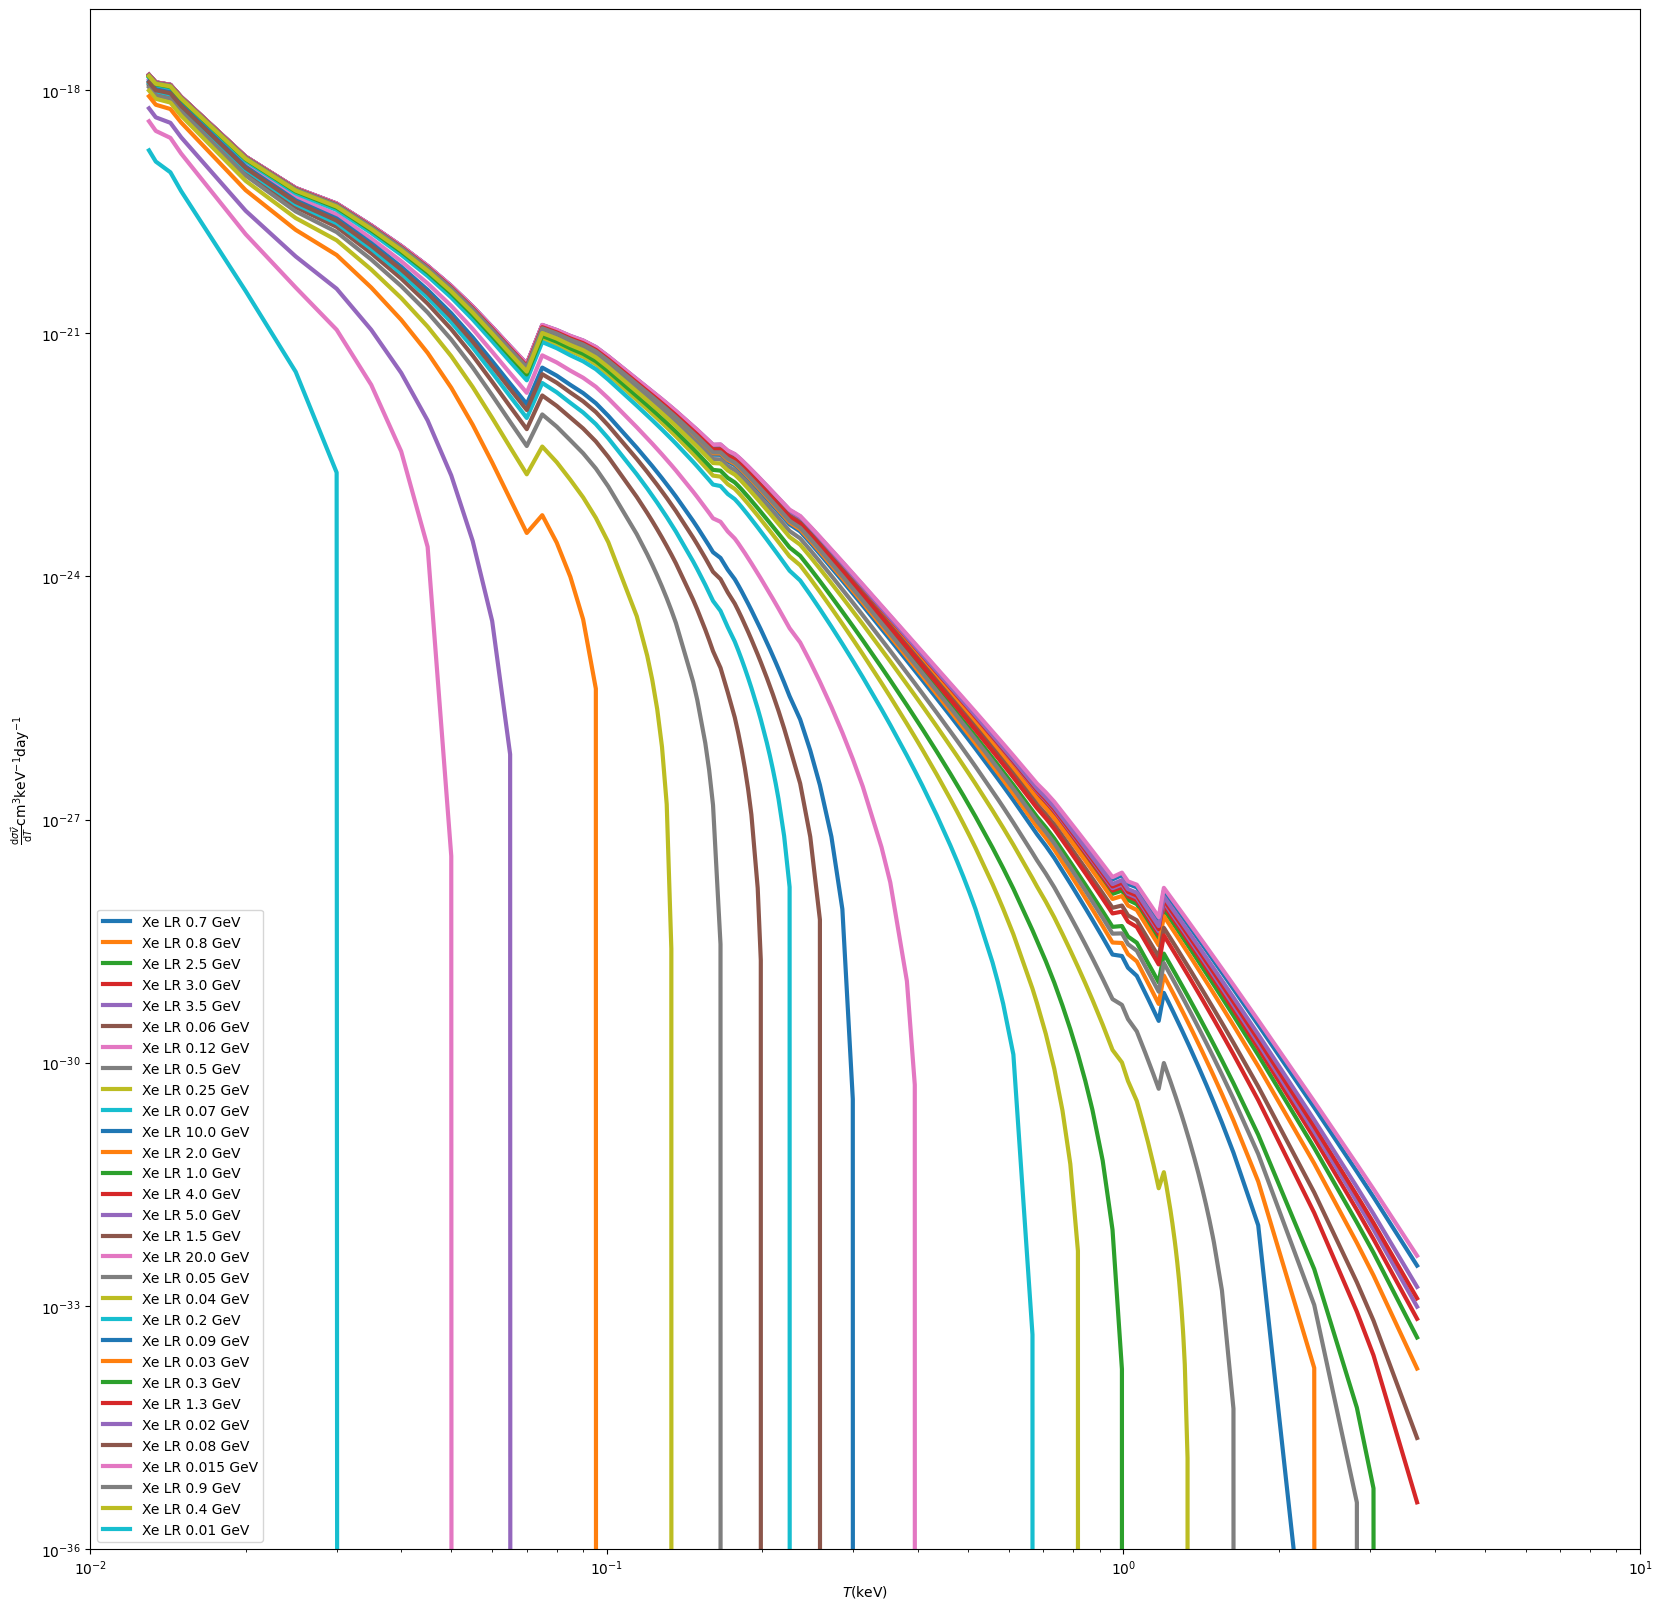

In [4]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

for fname in DD.get_valid_fnames("Xe", "LR"):
    DD.get_csd_vs_T_plot(fname).plot()
    
plt.legend(loc="lower left")
plt.show()

771.8311959612322 771.8311959612322


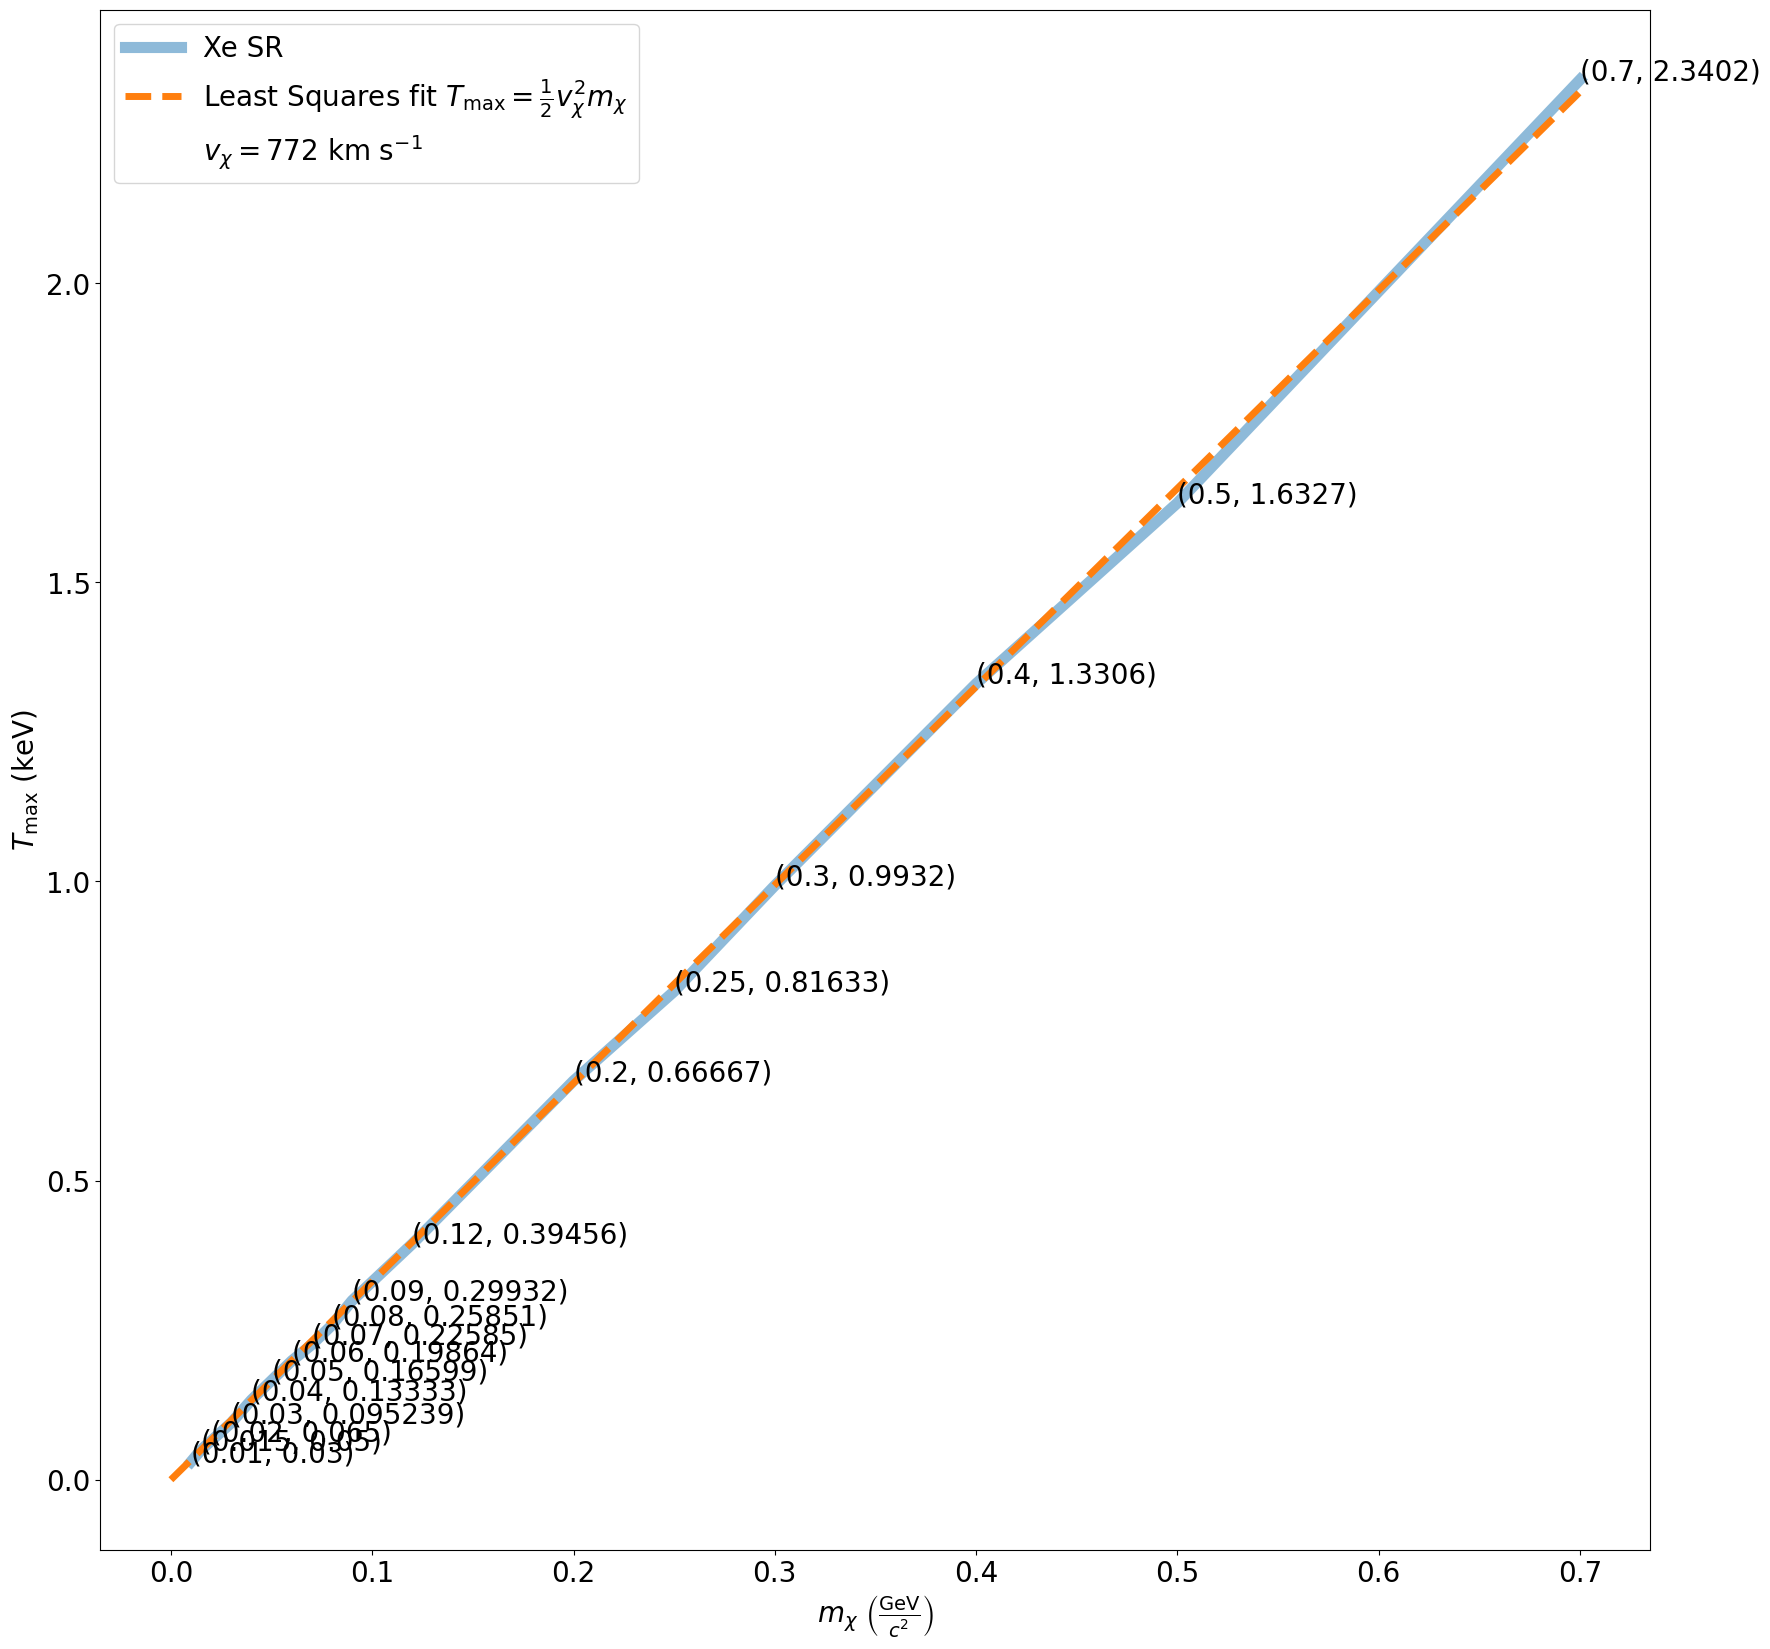

In [5]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
font = {'family' : 'DejaVu Sans',
        'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

maxGeV = 0.7
Tmaxes = []
Masses = []

for fname in DD.get_valid_fnames("Xe", "SR"):
    _, _, _, en, _ = DD.parse_fname(fname)
    if en > maxGeV:
        continue
    Tmaxes.append(DD.get_tmax(fname))
    Masses.append(en)

# Main plot
tm_mat = DD.get_tmax_matrix(Masses, Tmaxes, 5)
plt.plot(tm_mat[:, 0], tm_mat[:, 1], label = "Xe SR", linewidth = 8, alpha = 0.5)

# Annotations
ax = plt.gca()
for xy in tm_mat:
    xy = tuple(xy)
    ax.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")

# Fit
x = np.linspace(0, maxGeV, 2)
m = DD.fit_tmaxes(tm_mat)
c = 299792.458 # km  / s
old_mc = c**2 * m*1e-6
old_m = m*1e-6
new_mc = np.sqrt(2*old_mc)
new_m = c*np.sqrt(2*old_m)
print(new_m, new_mc)
plt.plot(x, x* m, "--", alpha = 1, linewidth = 5, label = r"Least Squares fit $T_{\text{max}} = \frac{1}{2} v_\chi^2 m_{\chi}$")
plt.plot([], [], ' ', label=r"$v_\chi = " + str(round(new_m,3)).rstrip('.0') + r"\text{ km s}^{-1}$")
# Show
plt.ylabel(r"$T_\text{max}$ (keV)")
plt.xlabel(r"$m_{\chi}$ $\left(\frac{\text{GeV}}{c^2}\right)$")
plt.legend(loc="upper left")
plt.savefig("Tmax_vs_mx.png")
plt.show()

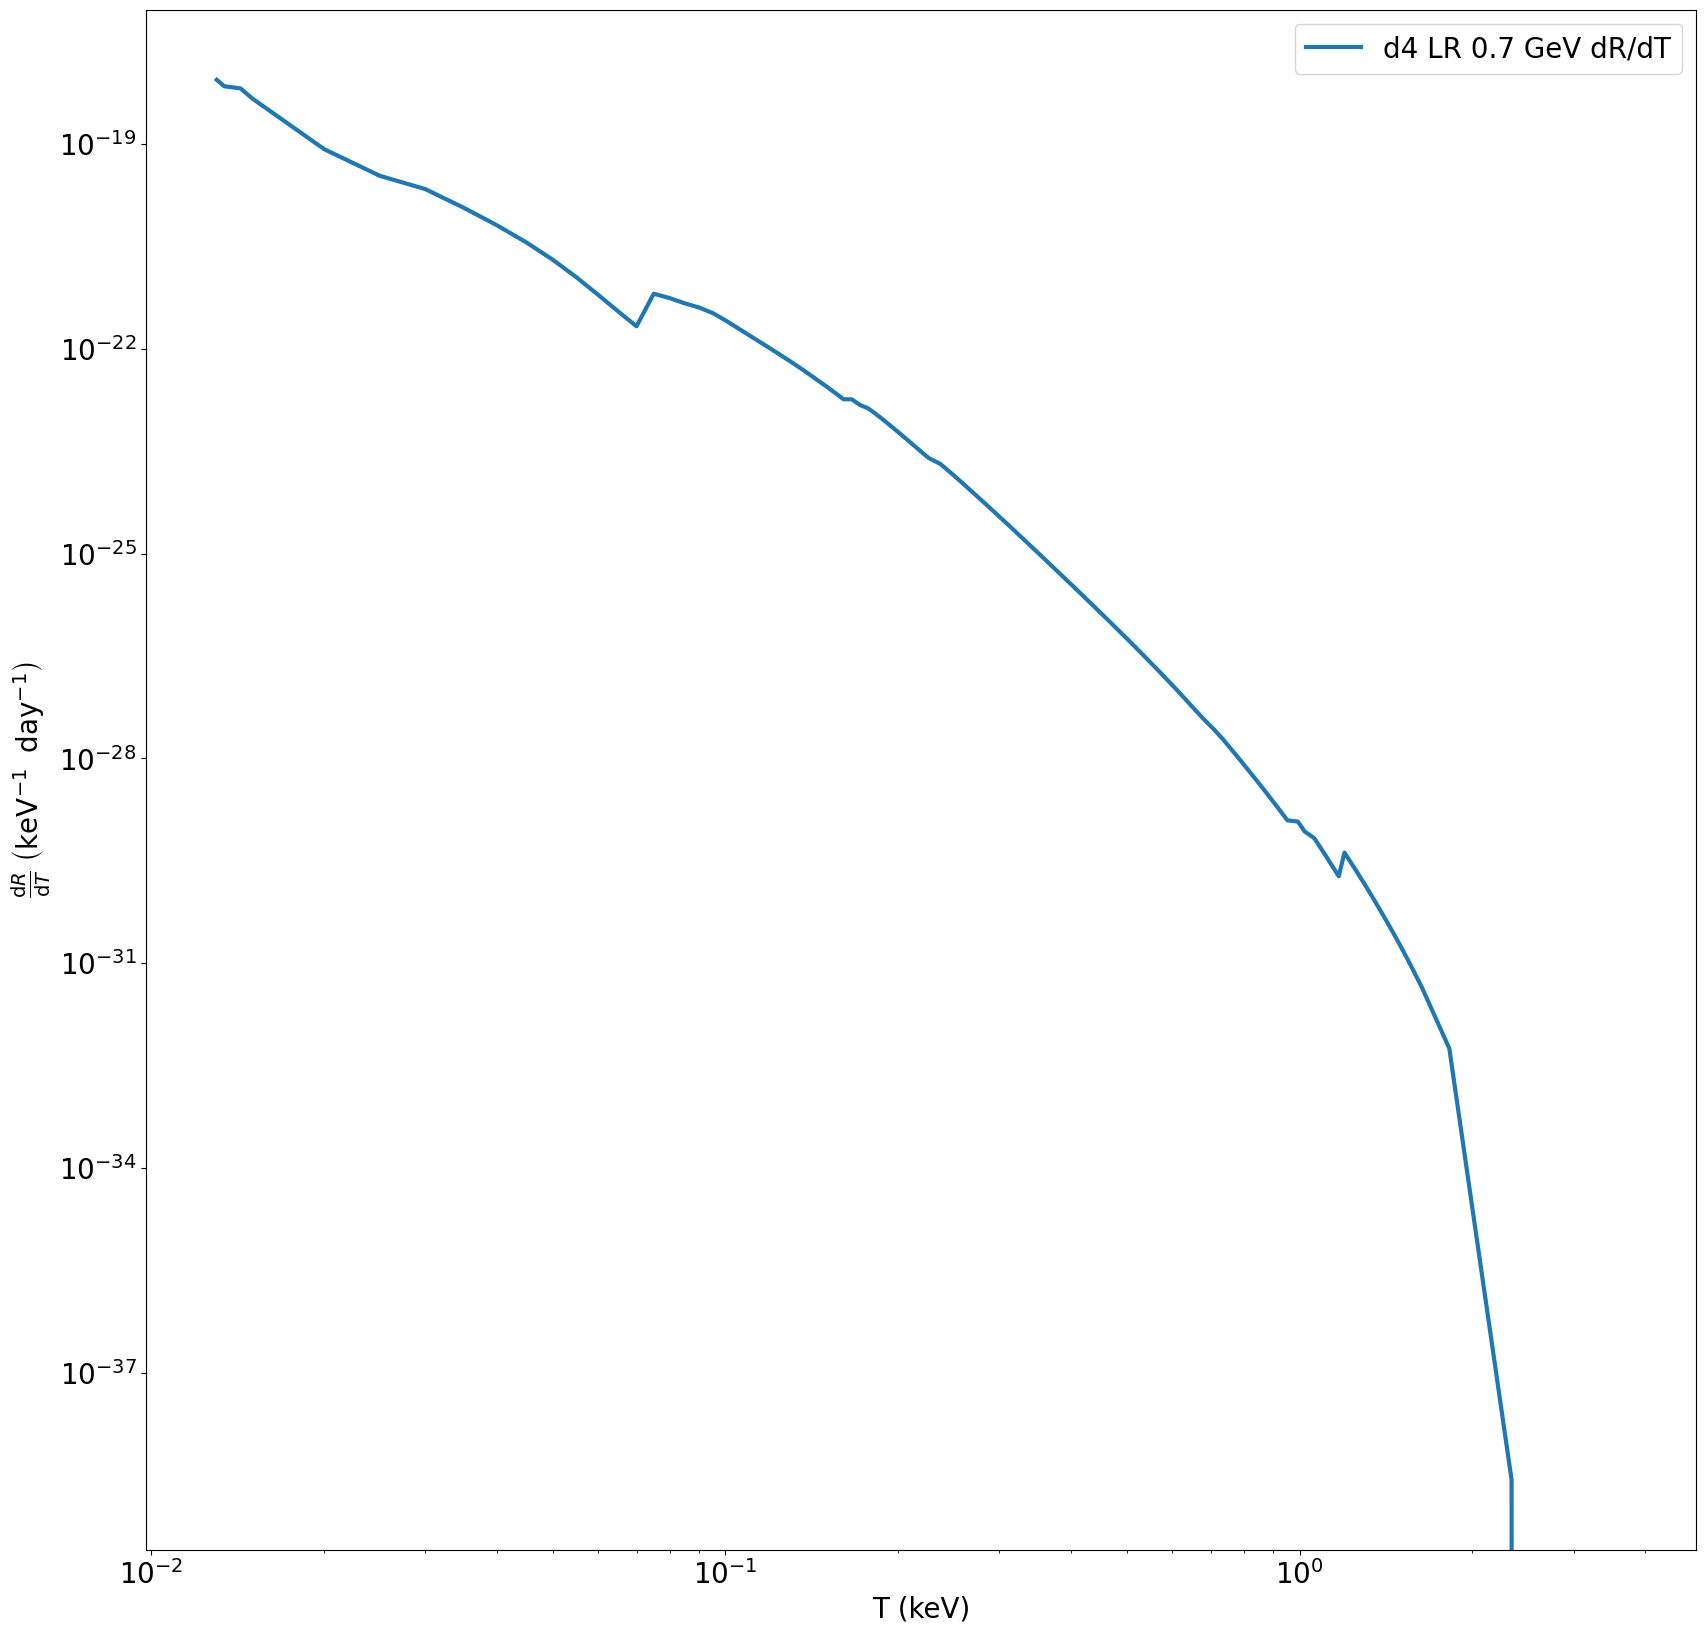

In [6]:
# N_T = 1.4453137824e+25
N_T = 1
rho_x = 0.4  # GeV cm^-3

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
for fname in DD.get_valid_fnames("Xe", "LR"):
    mol,_,rt, m_x, _ = DD.parse_fname(fname)
    T, dsv_dt = np.loadtxt(fname).T
    dr_dt = N_T * rho_x / m_x * dsv_dt

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("T (keV)")
    plt.ylabel(r"$\frac{\text{d}R}{\text{d}T}\;\left(\text{keV}^{-1}\;\;\text{day}^{-1}\right)$")
    plt.plot(T, dr_dt, linewidth = 3, label = f"{mol} {rt} {m_x} GeV dR/dT")
    break
plt.legend(loc="upper right")
plt.show()

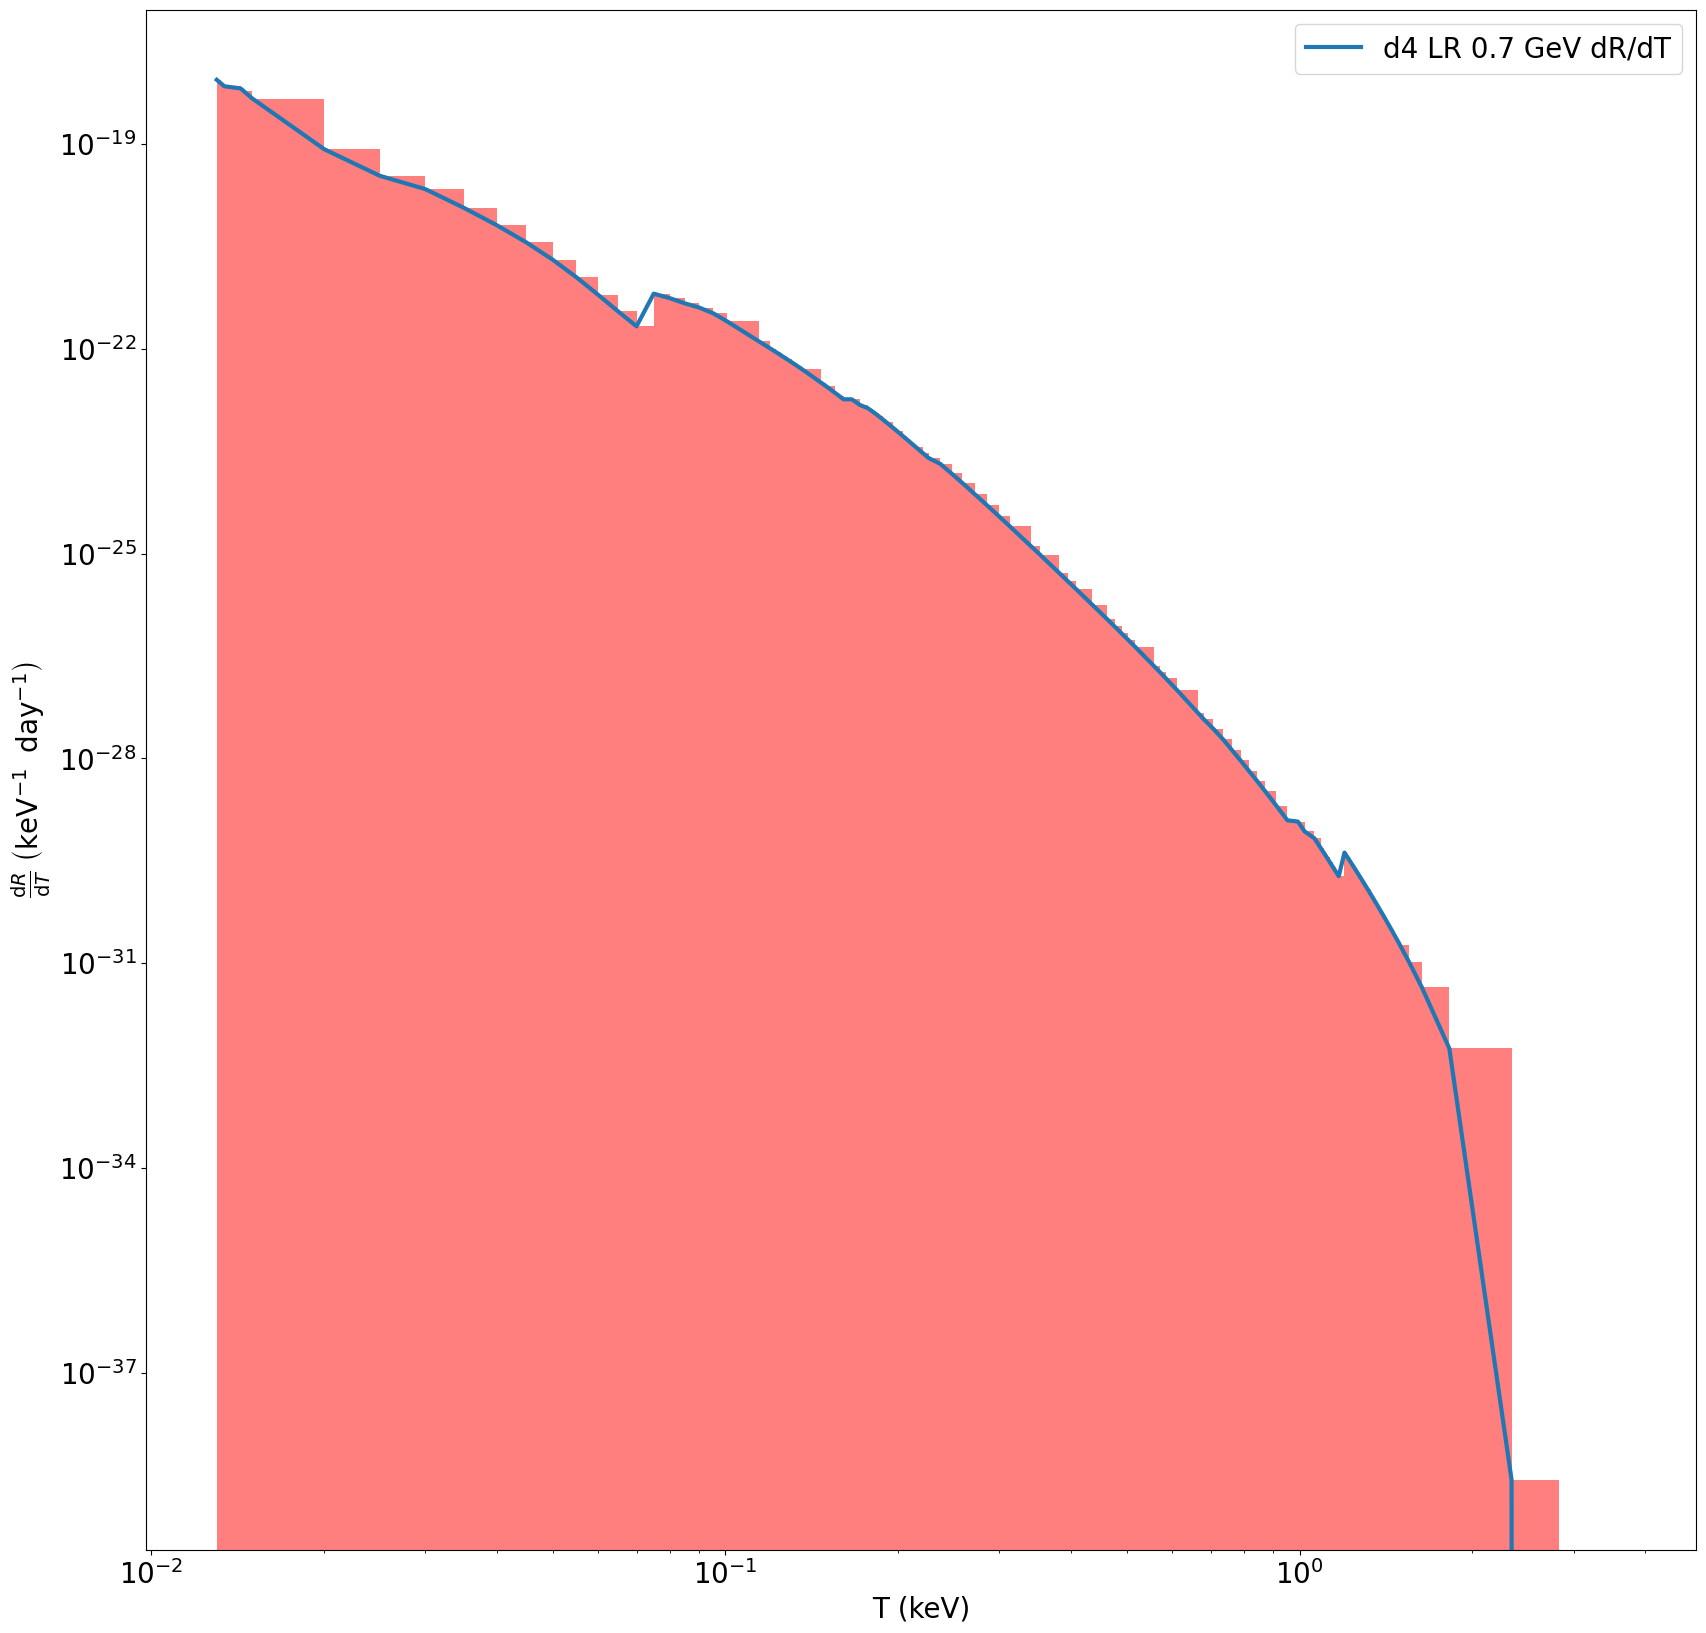

In [8]:
# N_T = 1.4453137824e+25
N_T = 1
rho_x = 0.4  # GeV cm^-3

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
for fname in DD.get_valid_fnames("Xe", "LR"):
    mol,_,rt, m_x, _ = DD.parse_fname(fname)
    T, dsv_dt = np.loadtxt(fname).T
    dr_dt = N_T * rho_x / m_x * dsv_dt

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("T (keV)")
    plt.ylabel(r"$\frac{\text{d}R}{\text{d}T}\;\left(\text{keV}^{-1}\;\;\text{day}^{-1}\right)$")
    ind = 0
    # widths = np.array([T[i+1] - T[i] for i in range(len(T) - 1)] + [0])
    widths = T[1:] - T[:-1]
    plt.bar((T[:-1] + widths/2)[ind:], dr_dt[:-1][ind:], width=widths[ind:], color="red", alpha=0.5)
    plt.plot(T, dr_dt, linewidth = 3, label = f"{mol} {rt} {m_x} GeV dR/dT")
    break
plt.legend(loc="upper right")
plt.show()

LENGTH T: 164
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.8231 2.3402 2.8299 3.0476 3.7007]
[1.551  1.6327 1.

163 164
164 163
163 19
{np.float64(0.8), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(5.0), np.float64(3.5), np.float64(4.0), np.float64(1.3), np.float64(10.0), np.float64(20.0)}


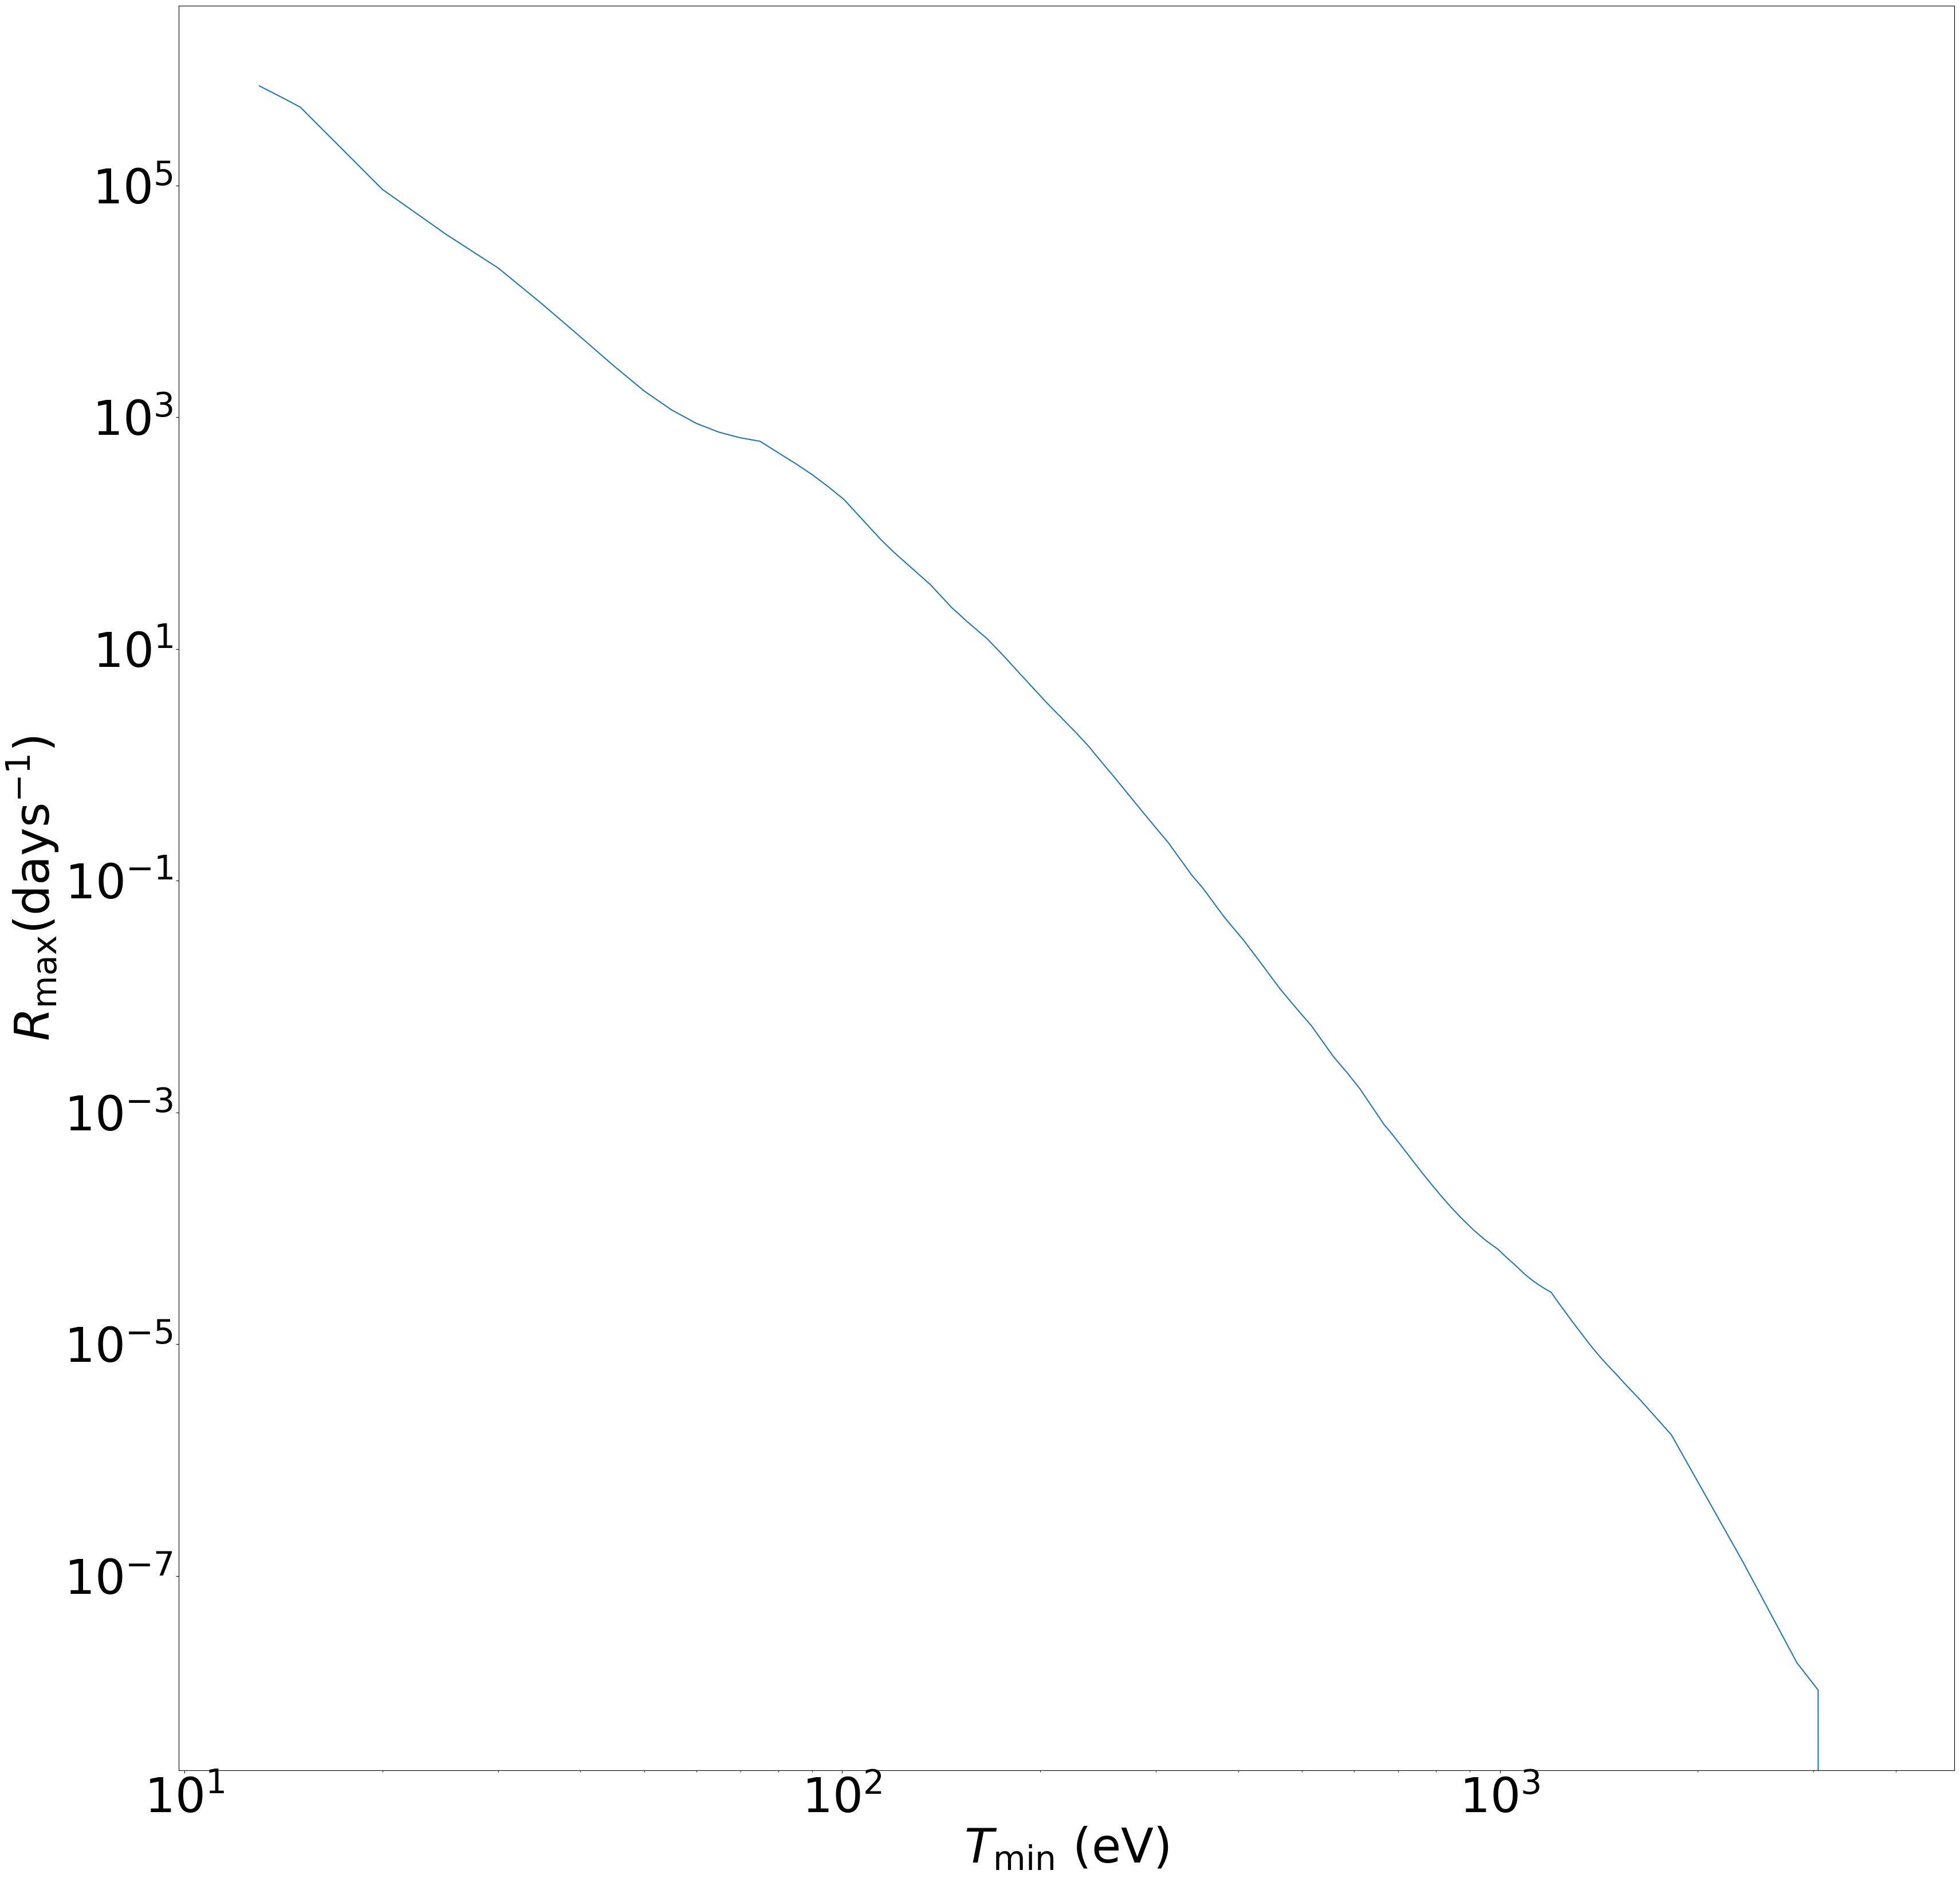

In [146]:
def cum_area(steps, values):
    total = 0
    totals = []
    totals.append(0)
    for i in range(len(steps)- 2, -1, -1):
        step_size = steps[i + 1] - steps[i]
        total += step_size * values[i]
        totals.append(total)
    return totals[::-1]
    
N_T = 1.4453137824e+25
# N_T = 1
rho_x = 0.4  # GeV cm^-3

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(40)
m_xs = []
# es = list(np.linspace(15, 80, 14))
# es = [13.2, 20, 25, 35, 50, 70, 100.68]
es = [e*1e3 for e in T]
# es = [e*1e3 for e in T[(T > 1.32) & (T < 1.4)]]
# es = [e * 1e3 for e in T[(T>2.)]]
print("LENGTH T:", len(T))
rs = [[] for e in es]
for fname in DD.get_valid_fnames("Xe", "LR"):
    mol,_,rt, m_x, _ = DD.parse_fname(fname)
    T, dsv_dt = np.loadtxt(fname).T
    dr_dt = N_T * rho_x / m_x * dsv_dt
    integrated = np.array(cum_area(T, dr_dt))
    m_xs.append(m_x)
    print(T[-7:])
    for k in range(len(rs)):
        # print(es[k])
        rs[k].append(integrated[np.where(T == round(es[k]*1e-3,5))][0])
    # r25.append(integrated[np.where(T == 0.025)][0])
    # r50.append(integrated[np.where(T == 0.05)][0])
    
    # plt.xlabel(r"$T_{\text{min}}$ (keV)")
    # plt.ylabel(r"$\int_{T_\text{min}}^{T_\text{max}} \frac{\text{d}R}{\text{d}T} \text{d}T\;\left(\text{day}^{-1}\right)$")
    # plt.ylabel(r"$R(T_\text{min})$")
    # plt.plot(T, integrated, linewidth = 3, label = f"{mol} {rt} {m_x} GeV dR/dT")
    # break
# plt.legend(loc="upper right")
# plt.show()
print("EMEXES:", len(m_xs))
font = {'family' : 'DejaVu Sans',
        'weight' : 'medium',
        'size'   : 60}

matplotlib.rc('font', **font)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$m_\chi$ (GeV)")
plt.ylabel(r"$R (\text{day}^{-1})$")
arr = np.vstack([m_xs, *rs]).T
arr = arr[arr[:,0].argsort()]
m_xs, rs = arr.T[0], arr.T[1:]
es_xmins = []
m_xmins = []
R_mins = []
R_maxs = []
m_xmaxs = []
es_xmaxs = []
# print(m_xs)
# print(rs[3])
# plt.gca().set_ylim([1, 1e6])
for i in range(len(es)):
    plt.plot(m_xs, rs[i], label=r"$T_{\text{min}} = " + str(es[i]) + "$ eV")
    # prev = None
    added = False
    maxmx = m_xs[0]
    maxR = 0
    for j in range(len(rs[i])):
        # print(rs[i][j], end=" ")
        if not added and rs[i][j] > 1e-14:
            # print("Here for", str(es[i]), m_xs[j], rs[i][j])
            es_xmins.append(es[i])
            m_xmins.append(m_xs[j])
            R_mins.append(rs[i][j])
            added = True
            # m_xmins.append(m_xs[j] if prev is None else prev)
        if rs[i][j] > maxR:
            maxR = rs[i][j]
            maxmx = m_xs[j]
    R_maxs.append(maxR)
    m_xmaxs.append(maxmx)
    es_xmaxs.append(es[i])
    if not added:
        print(es[i], " not added!!")
        print(rs[i])
        # prev = m_xs[j]

# Annotations
ax = plt.gca()
for xy in zip(m_xmins, R_mins):
    xy = tuple(xy)
    ax.annotate("(%s, %s)" % xy, xy=xy, textcoords="data")

# plt.plot(m_xs, r13_2, label=r"$T_{\text{min}} = 13.2$ eV")
# plt.plot(m_xs, r25, label=r"$T_{\text{min}} = 25$ eV")
# plt.plot(m_xs, r50, label=r"$T_{\text{min}} = 50$ eV")
plt.legend(loc = "upper left")
plt.show()

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(40)
# plt.yscale("log")

print(len(m_xmins), len(es))
print(len(m_xmaxs), len(es_xmins))
# plt.xlabel(r"$T_\text{min}$ (eV)")
# plt.ylabel(r"$m_{\chi_\text{min}}$ (GeV)")
# plt.scatter(es_xmins, m_xmins, s=160)

plt.ylabel(r"$R_\text{max}(\text{days}^{-1})$")
plt.xlabel(r"$T_{\text{min}}$ (eV)")
plt.xscale("log")
plt.yscale("log")
plt.plot(es_xmaxs, R_maxs)
print(len(set(es_xmins)), len(set(m_xmins)))
print(set(m_xs) - set(m_xmins))
plt.show()
# plt.savefig("R_m_x_T_min.png")